In [23]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import seaborn as sb

from string import ascii_lowercase

In [24]:
K = 28
L = 6
X = ((K * L * 23) % 20) + 1
Y = ((X + ((K * 5 + L * 7) % 19)) % 20) + 1
CHARS = ascii_lowercase + " "

In [25]:
def get_data(num):
  # Nacti text ze souboru
  with open("data/" + str(num).zfill(3) + ".txt") as file:
    lines = file.readlines()
    text = lines[1]

  # Spocitej cetnosti jednotlivych
  # symbolu (vcetne mezery)
  frequencies = dict.fromkeys(CHARS, 0)
  for symbol in text:
    frequencies[symbol] += 1

  return text, frequencies

In [26]:
def show_frequencies(frequencies, title):
  x = np.array(list(frequencies.keys()))
  y = np.array(list(frequencies.values()))

  plt.subplots(figsize = (12, 6))
  plt.title(title, fontweight = "bold", fontsize = 15)
  plt.bar(x, y)
  plt.show()

In [29]:
def show_table(header_vals, cells_vals, width, height):
  fig = go.Figure(data = [
    go.Table(
      header = dict(
        align = "center",
        fill_color = "lightgrey",
        font_color = "black",
        font_size = 15,
        height = 30,
        line_color = "black",
        values = ["<b>" + val + "</b>" for val in header_vals],
      ),
      cells = dict(
        align = "center",
        fill_color = "white",
        font_color = "black",
        font_size = 15,
        height = 30,
        line_color = "black",
        values = cells_vals,
      )
    )
  ])
  fig.update_layout(width = width, height = height)
  fig.show()

In [42]:
def get_transition_mat(text):
  dim = len(CHARS)
  matrix = np.zeros((dim, dim))

  # Vypln matici cetnostmi jednotlivych prechodu
  for i in range(len(text)):
    if i == len(text) - 1:
      break

    curr_char, next_char = text[i], text[i + 1]
    x, y = CHARS.index(curr_char), CHARS.index(next_char)

    matrix[x][y] += 1

  # Normalizuj hodnoty pomoci radkovych souctu
  sums = np.sum(matrix, axis = 1)
  for i in range(dim):
    for j in range(dim):
      matrix[i][j] /= sums[i]

  return matrix

In [47]:
def show_heat_map(matrix):
  sb.set(rc = {"figure.figsize": (12, 6)})
  sb.heatmap(matrix, linewidths = 1, linecolor = "black", xticklabels = CHARS, yticklabels = CHARS)

In [68]:
def get_stationary_dist(mat_P):
  dim = len(CHARS)
  mat_E = np.identity(dim)

  mat_A = np.transpose(mat_P) - mat_E
  mat_A = np.append(mat_A, [np.ones(dim)], axis = 0)

  vec_b = np.zeros(dim)
  vec_b = np.append(vec_b, [1], axis = 0)

  return np.linalg.solve(np.transpose(mat_A).dot(mat_A), np.transpose(mat_A).dot(vec_b))

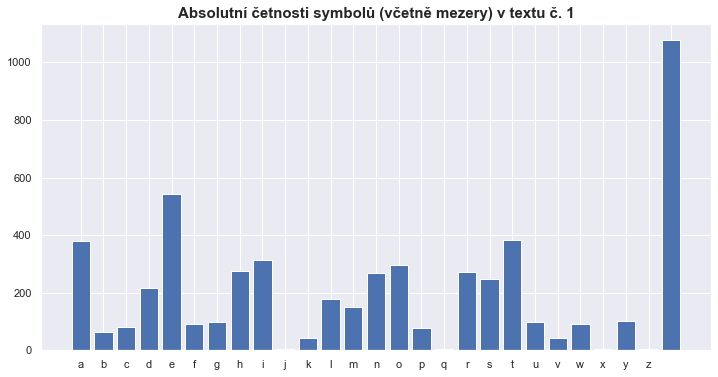

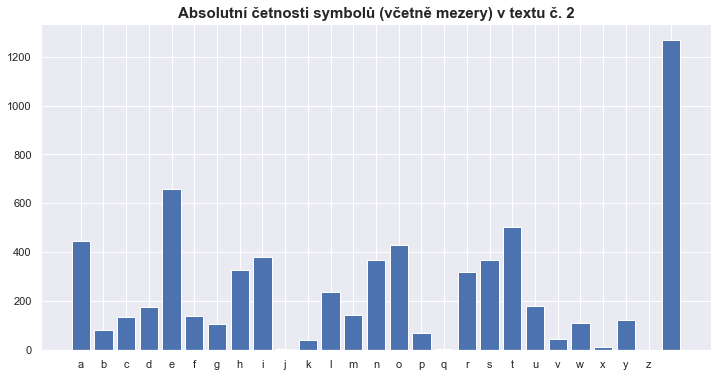

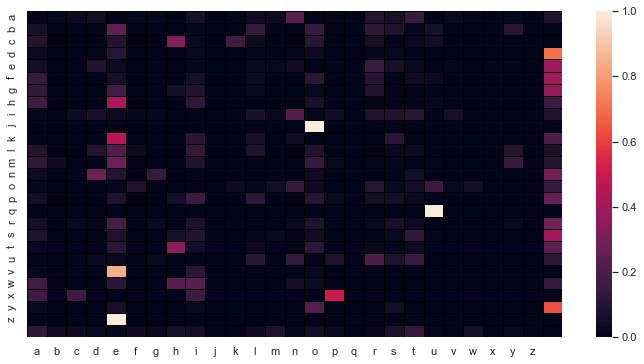

In [72]:
# Ziskej absolutni cetnosti symbolu v prvnim textu
text_x, frequencies_x = get_data(X)
show_frequencies(frequencies_x, "Absolutní četnosti symbolů (včetně mezery) v textu č. 1")

# Ziskej absolutni cetnosti symbolu v druhem textu
text_y, frequencies_y = get_data(Y)
show_frequencies(frequencies_y, "Absolutní četnosti symbolů (včetně mezery) v textu č. 2")

show_table(
  ["Symbol", "Četnost (text č. 1)", "Četnost (text č. 2)"],
  [list(CHARS), list(frequencies_x.values()), list(frequencies_y.values())],
  900, 1050
)

# Vytvor matici prechodu pro prvni text
trans_mat_x = get_transition_mat(text_x)
show_heat_map(trans_mat_x)

# Najdi stacionarni rozdeleni pro prvni text
stat_dist_x = get_stationary_dist(trans_mat_x)

show_table(
  ["i-tá složka π", "Hodnota"],
  [[val for val in range(1, len(CHARS) + 1)], [format(val, ".7f") for val in stat_dist_x]],
  900, 1050
)